### Imports

In [ ]:
!pip install -r ./../requirements.txt

In [3]:
%load_ext autoreload
%autoreload 2

import os

import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from data_management import data_loading, random_sampling, joint_random_sampling
from plotting import color_plot, plot3d_dataset, plot_target_classes
from model_evaluation import evaluate_classifiers, evaluation_pipeline, get_number_of_samples_table

np.random.seed(777)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Data loading

In [4]:
energy_threshold = 0.75
use_cone = False

manip_features = data_loading('cwt', energy_threshold, use_cone)

### Select Manipulation Category

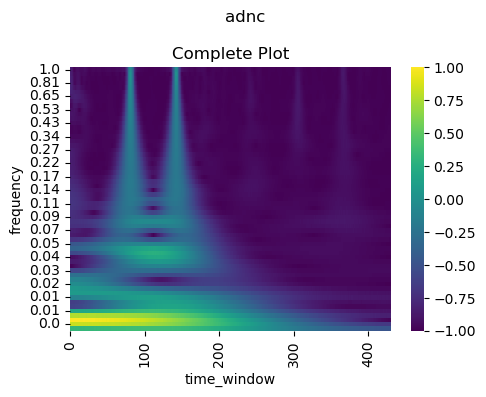

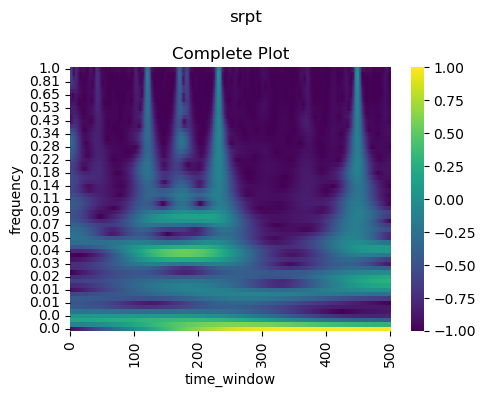

In [7]:
manip_category = 'poop_and_scoop'

manip_stocks_dict = manip_features[manip_category]
for stock, stock_features in manip_stocks_dict.items():
    feature_matrix = stock_features['feature_matrix']
    color_plot(feature_matrix, 1, 5, use_cone, stock, mask_index=6)

In [8]:
stock = 'adnc'
plot_against = 'frequency'
hue_var = 'target'
feature_matrix = manip_stocks_dict[stock]['feature_matrix']

plot3d_dataset(feature_matrix, stock, plot_against, hue_var, target_var=feature_matrix[:, -1])

### Random Sampling and Splitting

In [9]:
X_train_all, y_train, X_val_all, y_val, X_test_all, y_test = joint_random_sampling(manip_stocks_dict, 0.6, 0.5, 'uniform')

# Characteristics filtering
X_train = X_train_all[:, [1, 2, 3]]
X_val = X_val_all[:, [1, 2, 3]]
X_test = X_test_all[:, [1, 2, 3]]

### Distribution Visualization

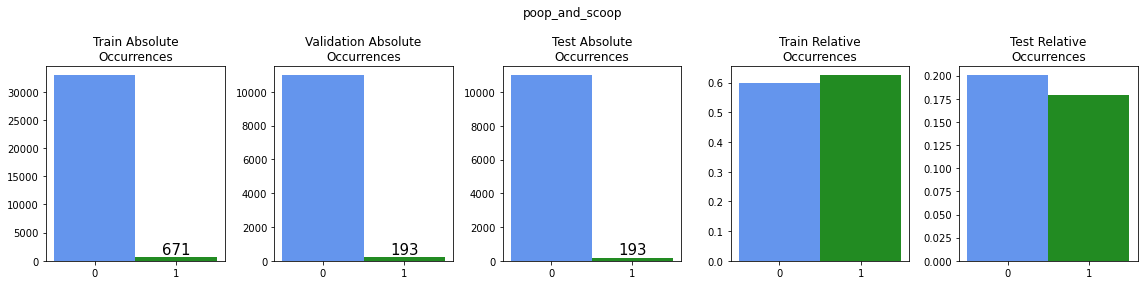

In [10]:
plot_target_classes(y_train, y_val, y_test, manip_category)

In [11]:
stock = 'adnc'
plot_against = 'frequency'
hue_var = 'target'

plot3d_dataset(X_test_all, stock, plot_against, hue_var, target_var=y_test)

### Model Benchmarking

In [23]:
gen_train_error_pair = [(0.1, 0.05), (0.05, 0.025), (0.015, 0.01)]

get_number_of_samples_table(gen_train_error_pair, 3, depth=3, pol_degree=3)

,logistic_regression,svm_linear,svm_polynomial,svm_rbf,decision_tree
"(epsilon, delta)",,,,,
"(0.1, 0.05)",44.0,44.0,54.0,inf,766.0
"(0.05, 0.025)",102.0,102.0,122.0,inf,3159.0
"(0.015, 0.01)",400.0,400.0,467.0,inf,36506.0


In [31]:
sampling_mode = 'joint'
distribution = 'uniform'

classifiers = ['logistic_regression', 'svm_linear', 'svm_polynomial', 'decision_tree', 'svm_rbf']
depth = 3
pol_degree = 3

In [19]:
gen_error, train_error = gen_train_error_pair[0]

for classifier in classifiers:

    _ = evaluation_pipeline(manip_stocks_dict, 3, classifier, gen_error, train_error, sampling_mode,
                                    depth=depth, distribution=distribution, pol_degree=pol_degree)

0.07866835922833491% are required. The training procedure is adequate.
120 of the data are used for training.
27935 of the data are used for validation.
27876 of the data are used for testing.
logistic_regression
Label 0.0 -> Train error 0.016666666666666666, Val error 0.018686235904778952, Test error 0.019766107045487157
Label 1.0 -> Train error 0.016666666666666666, Val error 0.018686235904778952, Test error 0.019766107045487157
0.07866835922833491% are required. The training procedure is adequate.
120 of the data are used for training.
27935 of the data are used for validation.
27876 of the data are used for testing.
svm_linear
Label 0.0 -> Train error 0.008333333333333333, Val error 0.018650438517988185, Test error 0.019837853350552447
Label 1.0 -> Train error 0.008333333333333333, Val error 0.018650438517988185, Test error 0.019837853350552447
0.0965475317802292% are required. The training procedure is adequate.
120 of the data are used for training.
27935 of the data are used for

In [26]:
gen_error, train_error = gen_train_error_pair[1]

for classifier in classifiers:

    _ = evaluation_pipeline(manip_stocks_dict, 3, classifier, gen_error, train_error, sampling_mode,
                                    depth=depth, distribution=distribution, pol_degree=pol_degree)

0.18236756002932183% are required. The training procedure is adequate.
120 of the data are used for training.
27935 of the data are used for validation.
27876 of the data are used for testing.
logistic_regression
Label 0.0 -> Train error 0.008333333333333333, Val error 0.018686235904778952, Test error 0.019801980198019802
Label 1.0 -> Train error 0.008333333333333333, Val error 0.018686235904778952, Test error 0.019801980198019802
0.18236756002932183% are required. The training procedure is adequate.
120 of the data are used for training.
27935 of the data are used for validation.
27876 of the data are used for testing.
svm_linear
Label 0.0 -> Train error 0.016666666666666666, Val error 0.019437981027385, Test error 0.019012770842301623
Label 1.0 -> Train error 0.016666666666666666, Val error 0.019437981027385, Test error 0.019012770842301623
0.21812590513311045% are required. The training procedure is adequate.
181 of the data are used for training.
27935 of the data are used for vali

In [33]:
gen_error, train_error = gen_train_error_pair[2]

for classifier in classifiers:

    _ = evaluation_pipeline(manip_stocks_dict, 3, classifier, gen_error, train_error, sampling_mode,
                                    depth=depth, distribution=distribution, pol_degree=pol_degree)

0.7151669020757719% are required. The training procedure is adequate.
480 of the data are used for training.
27756 of the data are used for validation.
27695 of the data are used for testing.
logistic_regression
Label 0.0 -> Train error 0.025, Val error 0.01941922467214296, Test error 0.01892038274056689
Label 1.0 -> Train error 0.025, Val error 0.01941922467214296, Test error 0.01892038274056689
0.7151669020757719% are required. The training procedure is adequate.
480 of the data are used for training.
27756 of the data are used for validation.
27695 of the data are used for testing.
svm_linear
Label 0.0 -> Train error 0.020833333333333332, Val error 0.019203055195273093, Test error 0.019209243545766384
Label 1.0 -> Train error 0.020833333333333332, Val error 0.019203055195273093, Test error 0.019209243545766384
0.8349573581734637% are required. The training procedure is adequate.
541 of the data are used for training.
27695 of the data are used for validation.
27695 of the data are u